In [1]:
# train and save model (python script or notebook)

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import joblib

#load & preprocessing

df = pd.read_csv('heart.csv')
X = df.drop('cp' , axis=1)
y = df['cp']
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

#train model

X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size=0.2 , random_state=42)
model = RandomForestClassifier()
model.fit(X_scaled , y)

#save model and scalar

joblib.dump(model , "heart_model.pkl")
joblib.dump(scalar , "scalar.pkl")

['scalar.pkl']

In [2]:
# step1 : train a classifier

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

#load & preprocessing

df = pd.read_csv('heart.csv')
X = df.drop('cp' , axis=1)
y = df['cp']

#train and split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

#scale feature

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

#train model

model = RandomForestClassifier()
model.fit(X_train_scaled , y_train)

RandomForestClassifier()

In [5]:
#step2 : export the model

#option 1 : using pickle

import pickle

#save the model

with open("heart_model.pkl" , "wb") as f:
    pickle.dump(model , f)

#save scalar too (important for deployment)

with open("scalar.pkl" , "wb") as f:
    pickle.dump(scalar , f)

#option 2 : using joblib

import joblib 

#save model

joblib.dump(model , "heart_model_joblib.pkl")

#save scalar

joblib.dump(scalar , "scalar_joblib.pkl")

['scalar_joblib.pkl']

In [11]:
#step 3 : load the saved model
#using pickle
import pickle
with open("heart_model.pkl" ,"rb") as f:
    loaded_model = pickle.load(f)

#using joblib
import joblib
loaded_model = joblib.load("heart_model_joblib.pkl")

#predict with loaded model

X_test_scaled = scalar.transform(X_test)
prediction = loaded_model.predict(X_test_scaled)

In [13]:
# ML pipeline steps

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report ,confusion_matrix , roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib

df = pd.read_csv('heart.csv')

X = df.drop('cp' , axis=1)
y = df['cp']

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=42)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)

model = RandomForestClassifier(n_estimators=5 , random_state=42)

model.fit(X_train , y_train)



RandomForestClassifier(n_estimators=5, random_state=42)

In [14]:
from sklearn.metrics import confusion_matrix , classification_report , roc_auc_score

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[: , 1]

print("Confusion matrix : " ,confusion_matrix(y_test , y_pred) )
print("Classification report : " ,classification_report(y_test , y_pred) )
print("ROC AUC  : " ,roc_auc_score(y_test , y_pred_prob) )


c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

Confusion matrix :  [[ 0  0 97  2]
 [ 0  0 39  0]
 [ 3  0 52  0]
 [ 0  0 12  0]]
Classification report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.00      0.00      0.00        39
           2       0.26      0.95      0.41        55
           3       0.00      0.00      0.00        12

    accuracy                           0.25       205
   macro avg       0.07      0.24      0.10       205
weighted avg       0.07      0.25      0.11       205



ValueError: multi_class must be in ('ovo', 'ovr')

In [15]:
import joblib
joblib.dump(model , "disease_risk_model.pkl")
joblib.dump(scalar , "scalar.pkl")

['scalar.pkl']

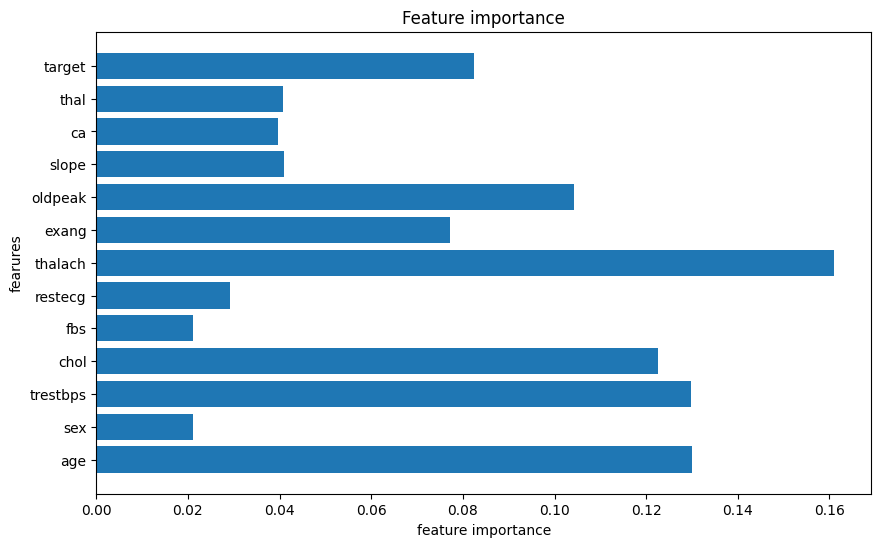

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('heart.csv')

feature = df.drop('cp' , axis=1).columns
importance = model.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(feature , importance)
plt.title('Feature importance')
plt.xlabel('feature importance')
plt.ylabel('fearures')
plt.show()

Thank you